In [1]:
from UNet import *
import numpy as np
import matplotlib.pyplot as plt
import deepdish as dd

In [2]:
raw_image = dd.io.load('sample_origonal_images.h5')
vector_field = dd.io.load('vector_fields.h5')

In [3]:
n_imgs = len(raw_image)
n_input_channel = 1
n_vf_channel = 4
size = raw_image[0].shape[0]
raw_image = raw_image.reshape(n_imgs, n_input_channel, size, size)

In [4]:
factor = 9

In [5]:
down_inputs = raw_image[:,:, ::factor,::factor] / factor
down_vf = vector_field[:, :, ::factor, ::factor] / factor

In [6]:
down_inputs_pad = np.zeros((n_imgs, n_input_channel, 96, 96))
down_vf_pad = np.zeros((n_imgs, n_vf_channel, 96, 96))

In [7]:
down_inputs_pad[:,:,:94, :94] = down_inputs
down_vf_pad[:,:,:94, :94] = down_vf 

In [8]:
size = down_inputs.shape[-1]

### plot loss curve

In [9]:
loss_array = dd.io.load('./model/unet_mse_loss_1000.h5')

In [10]:
loss_array.shape

(104000, 1)

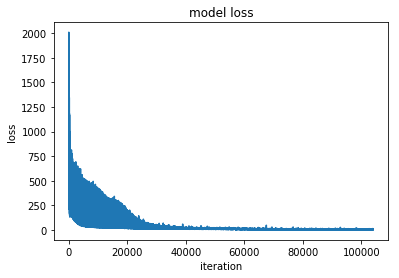

In [11]:
plt.plot(loss_array)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('model loss')
plt.show()

### lode pre-trained model

In [12]:
model = torch.load('./model/unet_gpu_1000.pkl', map_location=lambda storage, loc:storage.cuda(0))

In [13]:
test_data = torch.from_numpy(down_inputs_pad[-1:]).float()
test_data = Variable(test_data)

In [14]:
prediction = model(test_data)

### save prediction result

In [15]:
result_array = prediction.data.cpu().numpy().reshape(4, 96, 96)

In [16]:
dd.io.save('./model/prediction_result_1000.h5', result_array)

### result visualization

In [17]:
result_array.shape

(4, 96, 96)

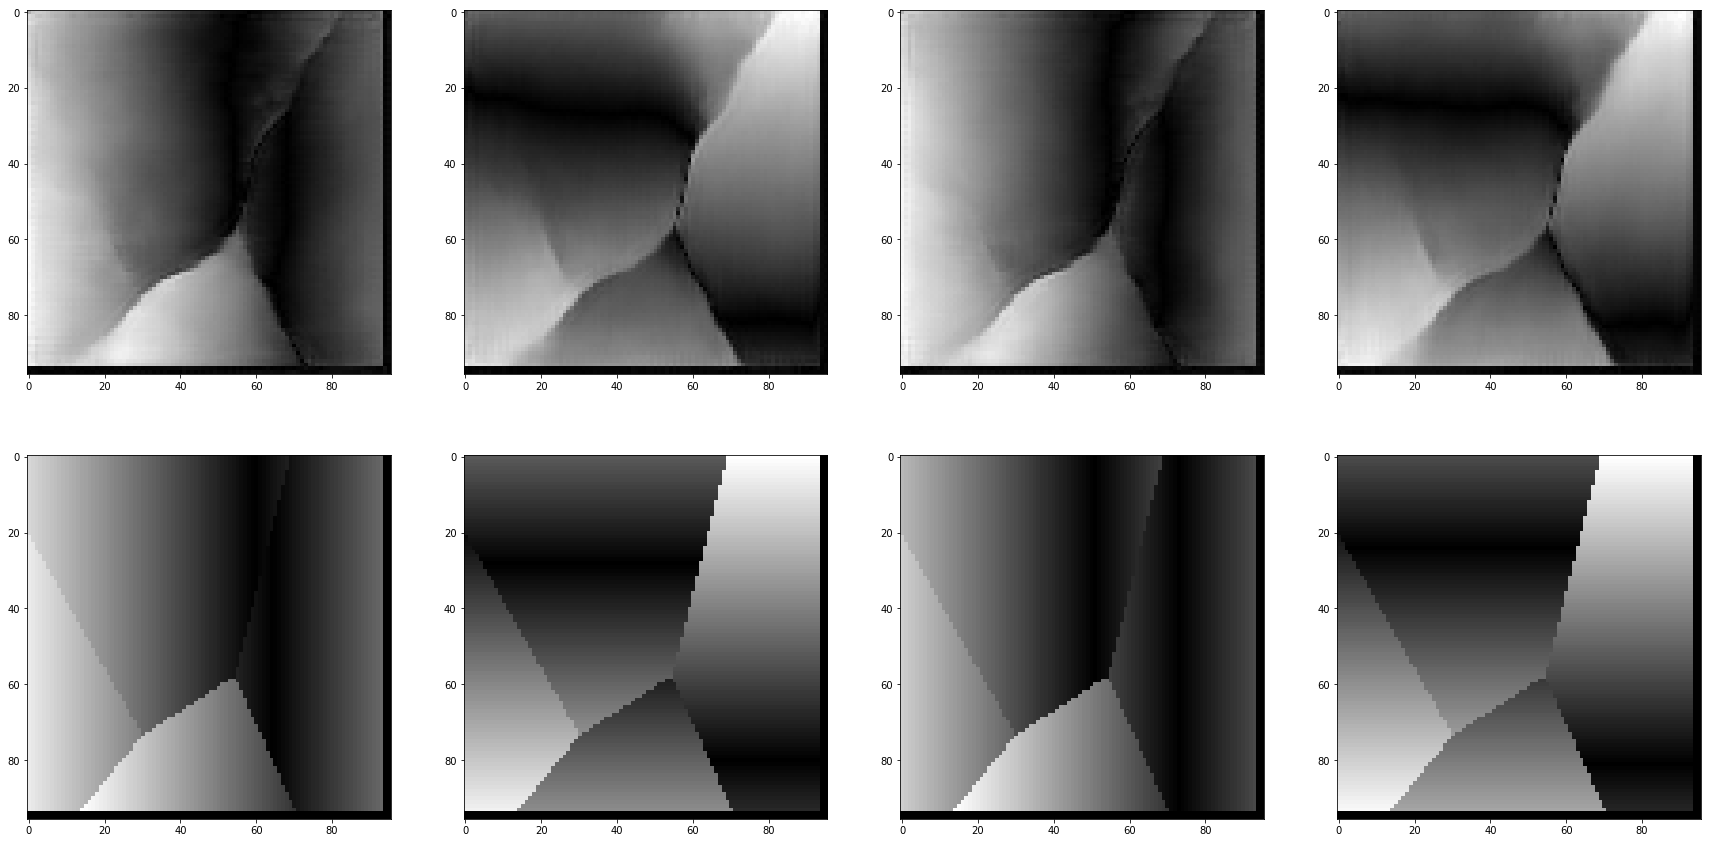

In [35]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(30, 15))
for i in range(8):
    plt.subplot(2, 4, i+1)
    if i <= 3:
        plt.imshow(np.abs(result_array[i%4]), cmap='gray')
    else:
        plt.imshow(np.abs(ground_truth[i%4]), cmap='gray')
plt.show()